In [1]:
# Import the plotting library
import matplotlib.pyplot as plt
# Import the data analysis library
import pandas as pd

## Plotting introduction

Matplotlib [Website here](https://matplotlib.org/) is the most popular plotting library for python. It is a bit barebone by default though.

One can directly plot values, and they are displayed directly in the notebook itself. If not x axis is given, it is assumed to be the integers 0-to-nb_values

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81, 100, 121, 144, 169, 196, 225, 256, 289, 324, 361]


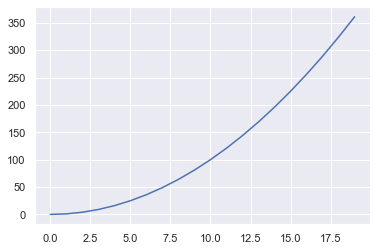

In [29]:
# Creating a list of values
y_values = []
for i in range(20):
    y_values.append(i*i)

plt.plot(y_values)
print(y_values)

By the way, a short hand version for creating a list is the following, which is equivalent to the code in the previous cell

In [40]:
y_values = [i*i for i in range(20)]
print(y_values)

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81, 100, 121, 144, 169, 196, 225, 256, 289, 324, 361]


Additionally, two iterables can be given to specify the x-values and the y-values of the corresponding graph.

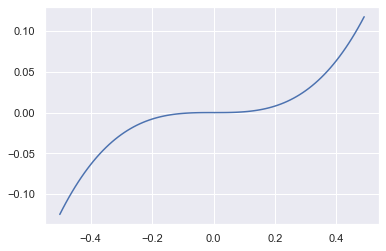

In [9]:
x_values = [i/100-0.5 for i in range(100)]
y_values = [x**3 for x in x_values]
plt.plot(x_values, y_values)

### Changing the plotting style

By default, the matplotlib style is really not very inviting, so let us change it. Now all the generated plots will use it, you can even re-run the previous cells.

The list of all default styles available are [here](https://matplotlib.org/3.1.3/gallery/style_sheets/style_sheets_reference.html)

In [6]:
plt.style.use('ggplot')

We actually recommend using the default styling done by the wonderful [seaborn](https://seaborn.pydata.org/) library

In [8]:
import seaborn as sns
sns.set()  # Set the complete seaborn styling

### Figure size, labels, title

In order to make your plots prettier, it is often useful to specify what we are talking about on each axis.

Uncomment the code lines to change the size of the figure and/or add legends to it.

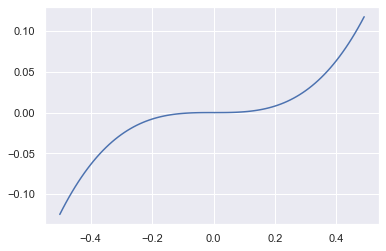

In [13]:
# Change the figure size
#plt.figure(figsize=(12, 8))

x_values = [i/100-0.5 for i in range(100)]
y_values = [x**3 for x in x_values]
plt.plot(x_values, y_values)

# Add labels
#plt.title('My Title')
#plt.xlabel('What is that axis?')
#plt.ylabel('Another axis')

### Distribution histograms

Histogram is a powerful way of visualizing a distribution of values. It only requires the list of values and will automatically aggregate them in counts.

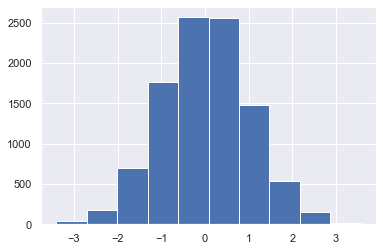

In [14]:
import random
# Generate random values based an a standard gaussian distribution (bell-shaped curve)
random_values = [random.gauss(0,1) for i in range(10000)]
plt.hist(random_values);

Sometimes, we want a more granular view of the histograms, and for this we need to increase the number of bins used for counting (i.e the number of bars)

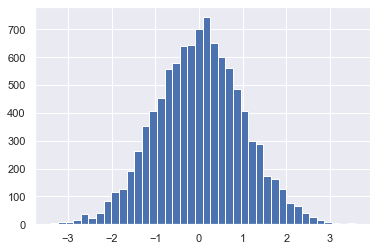

In [15]:
plt.hist(random_values, bins=40);

### DIY

Before using the easier automatic techniques, let us do things a bit manually.

Load the complete architectura data (all the json files), can you display the distribution of the years the treaties were issued?

For this, you will need first to load all the data as a list of dictionaries, then extract all the years in a single list and use `plt.hist` on that list.

**WARNING**: some entries might not have a defined year (it is equal to `None` the null value in python) and will need to not be included.

(array([ 0.,  2.,  5., 17., 30., 18., 16., 37., 17., 16.,  4.,  1.,  2.]),
 array([1450, 1475, 1500, 1525, 1550, 1575, 1600, 1625, 1650, 1675, 1700,
        1725, 1750, 1775]),
 <a list of 13 Patch objects>)

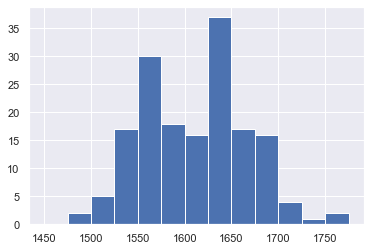

In [41]:
# Your code here
import glob
import json

architectura_data = []
for fn in glob.glob('data/architectura_treaties/*.json'):
    with open(fn ,'r', encoding='utf-8')as f:
        architectura_data.append(json.load(f))
        
years = []
for treaty in architectura_data:
    if treaty['year'] != None:
        years.append(treaty['year'])
    


Can you specify the bins so that they are exactly every quarter of century instead of the automated representation? Have a look at the documentation of `plt.hist` and especially the `bins` parameter.

Make it pretty by giving it a title and labelling the axis

Text(0, 0.5, 'Number of books')

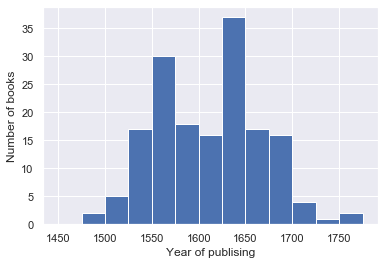

In [42]:
# Your code here
plt.hist(years, bins=range(1450, 1800, 25))
plt.xlabel('Year of publising')
plt.ylabel('Number of books')

# Pandas Introduction

Pandas [website here](https://pandas.pydata.org/) is a powerful and widely used data analysis library.

The fundamental object type is the `DataFrame` which is basically a table representation and can be created directly by loading a `.csv`.

## Creating a DataFrame

Here we load a sample dataset representing data about passengers of the titanic.

In [99]:
titanic_df = pd.read_csv('data/titanic.csv')
type(titanic_df)

pandas.core.frame.DataFrame

In [44]:
# A preview can directly be visualized in the notebook
titanic_df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


The `DataFrame` is made of a serie of columns where each has a type.

In [87]:
titanic_df.dtypes

survived         int64
pclass           int64
sex             object
age            float64
sibsp            int64
parch            int64
fare           float64
embarked        object
class           object
who             object
adult_male        bool
deck            object
embark_town     object
alive           object
alone             bool
dtype: object

But it is also possible to give a list of dictionnaries as input to create a DataFrame from any form of data we have, do this by giving the list of dictionnaries coming from the loaded architectura data

In [45]:
# Change architectura_data to your own loaded data
architectura_df = pd.DataFrame(architectura_data)

In [46]:
architectura_df

,url,title,year,imprint,localisation,language,description,authors,topics,nb_pages,full_text_size
0,http://architectura.cesr.univ-tours.fr/Traite/...,"La pratique du trait a preuves, de Mr Desargue...",1643.0,"Paris, P. Des Hayes, 1643","Tours, Musée des Beaux-Arts, 1950-7-1",fr,In 1643 Abraham Bosse and Girard Desargues had...,"[Desargues, Girard, Bosse, Abraham]",[Stereotomy],294,308734
1,http://architectura.cesr.univ-tours.fr/Traite/...,Deux exemples des cinq ordres de l’architectur...,1683.0,"Paris, published by the author, 1683","Paris, Ensba, 21426",fr,Jean Le Blond came from a family of artists an...,"[Le Blond, Jean]",[Orders],54,23930
2,http://architectura.cesr.univ-tours.fr/Traite/...,Architectura...,1577.0,"Antwerp, G. de Jode, 1577","Paris, Binha, Fol. Res 207",fr,In 1577 Vredeman de Vries published his most ...,"[Vredeman de Vries, Hans]","[Domestic architecture, Military architecture,...",33,64181
3,http://architectura.cesr.univ-tours.fr/Traite/...,Le secret d’architecture...,1642.0,"La Flèche, G. Griveau, 1642","Paris, Ensba, Les 1251",fr,"The by Mathurin Jousse, the first treatise ent...","[Jousse, Mathurin]",[Stereotomy],259,316446
4,http://architectura.cesr.univ-tours.fr/Traite/...,Hypnerotomachia Poliphili...,1499.0,"Venice, A. Manuce, 1499","Paris, Ensba, Les 1358",it,"In the second edition which he reviewed in , ...","[Colonna, Francesco]","[Architecture, Gardens]",467,996733
...,...,...,...,...,...,...,...,...,...,...,...
175,http://architectura.cesr.univ-tours.fr/Traite/...,Pieces d’architecture...,1633.0,"Paris, M. van Lochom, 1633","Paris, Binha, 4 Res 259",fr,We know \r\n almost nothing about Pie...,"[Collot, Pierre]","[Doors, Chimneys]",12,706
176,http://architectura.cesr.univ-tours.fr/Traite/...,I quattro primi libri di architettura...,1554.0,"Venise, A. Manuce's sons, 1554","Paris, Bensba, 00269 Z 0600 in-4",it,Pietro Cataneo was born at the beginning of th...,"[Cataneo, Pietro]","[Domestic architecture, Military architecture,...",116,322329
177,http://architectura.cesr.univ-tours.fr/Traite/...,La perspective practique...,1651.0,"Paris, F. Langlois’ widow, 1651","Tours, Private collection",fr,is the second edition of the treatise on per...,"[Du Breuil, Jean]",[Perspective],447,561168
178,http://architectura.cesr.univ-tours.fr/Traite/...,Des ordres de colonnes...,1688.0,"[Paris, Pierre Aubouyn, Pierre Émery & Charles...","Tours, Cesr, SR/6A (26470)",fr,"The third edition of the collection , s. l., s...","[Bosse, Abraham]",[Orders],44,40551


### Accessing single column of the data

`DataFrame` are complex and powerful objects. An example is that you can directly access single column directly as a `pd.Serie` object.

Note also the NaN (Not-A-Number) values representing missing data, which is a common occurence in tabular data as we often have incomplete information.

In [47]:
titanic_df.age

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: age, Length: 891, dtype: float64

The name of the column sometimes has spaces or weird characters and can not be used as a property name of the dataframe. In all cases, you can always access a column with standard indexing.

In [93]:
titanic_df['age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: age, Length: 891, dtype: float64

The `Serie` object has a lot of methods available (have a look at them). For instance, directly plotting the histogram ignoring the missing values, or accessing the maximum value or the corresponding index of it in the table.

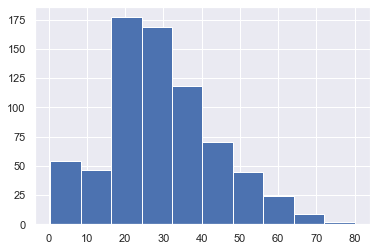

In [48]:
titanic_df.age.hist()

In [57]:
# Display the age of the oldest passenger and the corresponding index in the Dataframe
titanic_df.age.max(), titanic_df.age.idxmax()

(80.0, 630)

## Accessing single rows

A single row can directly be accessed with its row number and `iloc`.

In [94]:
titanic_df.iloc[10]

survived                 1
pclass                   3
sex                 female
age                      4
sibsp                    1
parch                    1
fare                  16.7
embarked                 S
class                Third
who                  child
adult_male           False
deck                     G
embark_town    Southampton
alive                  yes
alone                False
Name: 10, dtype: object

The value of the corresponding from a single row can be accessed directly

In [96]:
titanic_df.iloc[10].embark_town

'Southampton'

In [97]:
titanic_df.iloc[10].fare

16.7

### DIY

Using `architectura_df`, can you plot again the distribution of years of the books but in a much simpler way compared to the previous version?

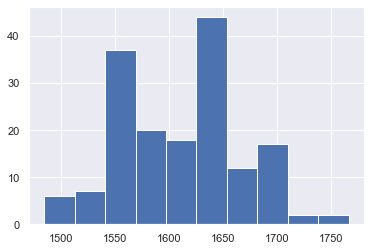

In [86]:
# your code here
architectura_df.year.hist()

Using `architectura_df` can you visit the corresponding webpage of the oldest book in the dataset? You will need first to find its index and then use the `loc` indexing method of the `DataFrame` to extract the correct row.

An alternative solution is to sort the dataframe by year and taking the first row.

Notice how we do not need to care about missing or `None` values as it is handled automatically.

In [85]:
#Your code here
architectura_df.sort_values('year').iloc[0].url

'http://architectura.cesr.univ-tours.fr/Traite/Notice/ENSBA_20A4.asp?param=en'

### Filtering the data

`DataFrame` are very easy to filter. The trick is to apply conditional logic on `Serie`s. For instance, looking at only the male passenger, we get this binary `Serie`.

In [50]:
titanic_df.sex == 'male'

0       True
1      False
2      False
3      False
4       True
       ...  
886     True
887    False
888    False
889     True
890     True
Name: sex, Length: 891, dtype: bool

This can then be used directly as indexing input for the `DataFrame` to get a new `DataFrame`

In [88]:
titanic_df[titanic_df.sex == 'male']

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,0,2,male,28.0,0,0,10.5000,S,Second,man,True,NaN,Southampton,no,True
884,0,3,male,25.0,0,0,7.0500,S,Third,man,True,NaN,Southampton,no,True
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


Conditions can be put together, but instead of `and` and `or`, one need to use respectively `&` and `|`. Also beware of parenthesis.

In [51]:
titanic_df[(titanic_df.sex == 'male') & (titanic_df.age < 10)]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
7,0,3,male,2.00,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
16,0,3,male,2.00,4,1,29.1250,Q,Third,child,False,NaN,Queenstown,no,False
50,0,3,male,7.00,4,1,39.6875,S,Third,child,False,NaN,Southampton,no,False
63,0,3,male,4.00,3,2,27.9000,S,Third,child,False,NaN,Southampton,no,False
78,1,2,male,0.83,0,2,29.0000,S,Second,child,False,NaN,Southampton,yes,False
164,0,3,male,1.00,4,1,39.6875,S,Third,child,False,NaN,Southampton,no,False
165,1,3,male,9.00,0,2,20.5250,S,Third,child,False,NaN,Southampton,yes,False
171,0,3,male,4.00,4,1,29.1250,Q,Third,child,False,NaN,Queenstown,no,False
182,0,3,male,9.00,4,2,31.3875,S,Third,child,False,NaN,Southampton,no,False
183,1,2,male,1.00,2,1,39.0000,S,Second,child,False,F,Southampton,yes,False


### DIY

Using filtering and `len` can you compute how many treaties in architectura were issued in French and before 1650?

In [54]:
# Your code here
architectura_df[architectura_df.year<1650]

,url,title,year,imprint,localisation,language,description,authors,topics,nb_pages,full_text_size
0,http://architectura.cesr.univ-tours.fr/Traite/...,"La pratique du trait a preuves, de Mr Desargue...",1643.0,"Paris, P. Des Hayes, 1643","Tours, Musée des Beaux-Arts, 1950-7-1",fr,In 1643 Abraham Bosse and Girard Desargues had...,"[Desargues, Girard, Bosse, Abraham]",[Stereotomy],294,308734
2,http://architectura.cesr.univ-tours.fr/Traite/...,Architectura...,1577.0,"Antwerp, G. de Jode, 1577","Paris, Binha, Fol. Res 207",fr,In 1577 Vredeman de Vries published his most ...,"[Vredeman de Vries, Hans]","[Domestic architecture, Military architecture,...",33,64181
3,http://architectura.cesr.univ-tours.fr/Traite/...,Le secret d’architecture...,1642.0,"La Flèche, G. Griveau, 1642","Paris, Ensba, Les 1251",fr,"The by Mathurin Jousse, the first treatise ent...","[Jousse, Mathurin]",[Stereotomy],259,316446
4,http://architectura.cesr.univ-tours.fr/Traite/...,Hypnerotomachia Poliphili...,1499.0,"Venice, A. Manuce, 1499","Paris, Ensba, Les 1358",it,"In the second edition which he reviewed in , ...","[Colonna, Francesco]","[Architecture, Gardens]",467,996733
5,http://architectura.cesr.univ-tours.fr/Traite/...,La fidelle ouverture de lart de serrurier...,1627.0,"La Flèche, G. Griveau, 1627","Paris, Ensba, Les 1249",fr,In his dedication \r\n to the Jesuit ...,"[Jousse, Mathurin]","[Locksmithing, Iron working]",160,301756
...,...,...,...,...,...,...,...,...,...,...,...
172,http://architectura.cesr.univ-tours.fr/Traite/...,Regola... Regel... Reigle... The rule...,1629.0,"Utrecht, C. van de Pas, 1629","Paris, Ensba, Les 1779",it,The edition that was printed in 1629 in Utrech...,[Vignola],[Orders],187,137215
173,http://architectura.cesr.univ-tours.fr/Traite/...,De l'architecture antique...,1608.0,"Paris, D. Cavellat, 1608","Paris, Binha, 8 Res 215",fr,In 1608 Denise Cavellat published Sagredo's f...,"[Sagredo, Diego de]","[Orders, Architecture]",112,146909
174,http://architectura.cesr.univ-tours.fr/Traite/...,L’architecture...,1576.0,"Paris, J. de Marnef & G. Cavellat, 1576","Tours, Cesr, SR/46, 12040",fr,Philibert \r\n De l’Orme died in 1570...,"[De l’Orme, Philibert]","[Doors, Stereotomy, Chimneys, Orders, Architec...",619,1095173
175,http://architectura.cesr.univ-tours.fr/Traite/...,Pieces d’architecture...,1633.0,"Paris, M. van Lochom, 1633","Paris, Binha, 4 Res 259",fr,We know \r\n almost nothing about Pie...,"[Collot, Pierre]","[Doors, Chimneys]",12,706


# Easy advanced plotting with seaborn

Seaborn is a powerful library for advance plotting, what can you say from the following visualization about the survival of the people on the Titanic?

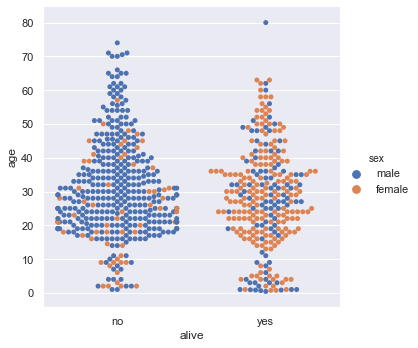

In [61]:
sns.catplot(x="alive", y="age", hue="sex", kind="swarm", data=titanic_df);

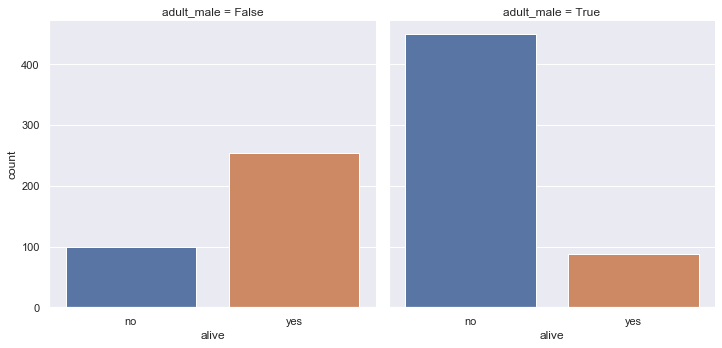

In [67]:
sns.catplot(col="adult_male", x='alive', kind='count', data=titanic_df);

## Exercise

Can you use a [Box plot](https://seaborn.pydata.org/tutorial/categorical.html#boxplots) to visualize the year of publishing of the architectura treatises based on their language?

After having managed to plot the complete dataset. Filter them based on the three more used languages (use `value_counts()` to find which are the most common languages, and `Serie.isin()` to filter based on multiple values).

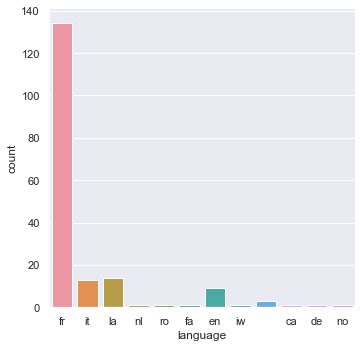

In [69]:
sns.catplot(x="language", kind='count', data=architectura_df)

In [89]:
filtered_df = architectura_df[architectura_df.language.isin(('fr', 'it', 'la'))]

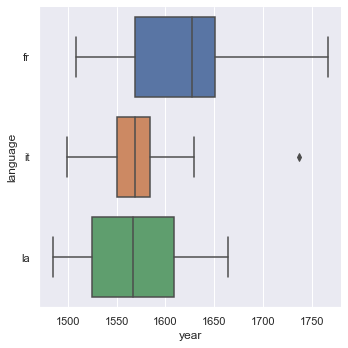

In [98]:
sns.catplot(y='language', x='year', kind='box', data=filtered_df);

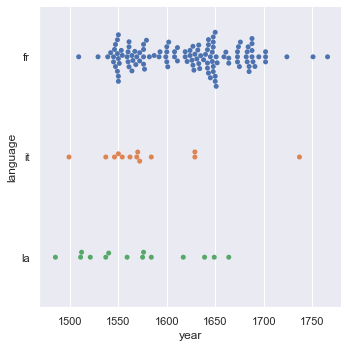

In [92]:
sns.catplot(y='language', x='year', kind='swarm', data=filtered_df);

## Explore data by yourself (open ended)

Load the `xenotheka.json` data and put it in a `DataFrame`, how would you explore its characteristics?